# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Apple) </font>

In [2]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'AAPL'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-20,0.403571,0.416786,0.399643,0.414643,0.351947,279132000
2003-10-21,0.416250,0.417857,0.406250,0.413929,0.351341,176461600
2003-10-22,0.409643,0.414286,0.405000,0.406429,0.344976,161599200
2003-10-23,0.405893,0.413393,0.403393,0.410536,0.348462,165211200
2003-10-24,0.402857,0.408036,0.396964,0.403571,0.342550,219856000
...,...,...,...,...,...,...
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,177.149994,57549400


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2003-10-20 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [5]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,41.064532,41.517863,40.628309,41.090829,39.589578,4.090240e+08
std,51.311743,51.904384,50.764408,51.358526,51.335438,3.956596e+08
min,0.350893,0.355179,0.343750,0.351786,0.298595,3.145820e+07
25%,5.408036,5.499821,5.311250,5.435714,4.613816,1.151032e+08
50%,20.644644,20.922501,20.425714,20.718929,17.738634,2.754264e+08
75%,46.801250,47.198750,46.445000,46.817499,44.873901,5.759642e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,3.372970e+09


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [7]:
stock_data.shape
# kích thước dữ liệu

(5035, 6)

In [8]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

In [10]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2003-10-20      0.351947
2003-10-21      0.351341
2003-10-22      0.344976
2003-10-23      0.348462
2003-10-24      0.342550
                 ...    
2023-10-13    178.850006
2023-10-16    178.720001
2023-10-17    177.149994
2023-10-18    175.839996
2023-10-19    175.460007
Name: Adj Close, Length: 5035, dtype: float64

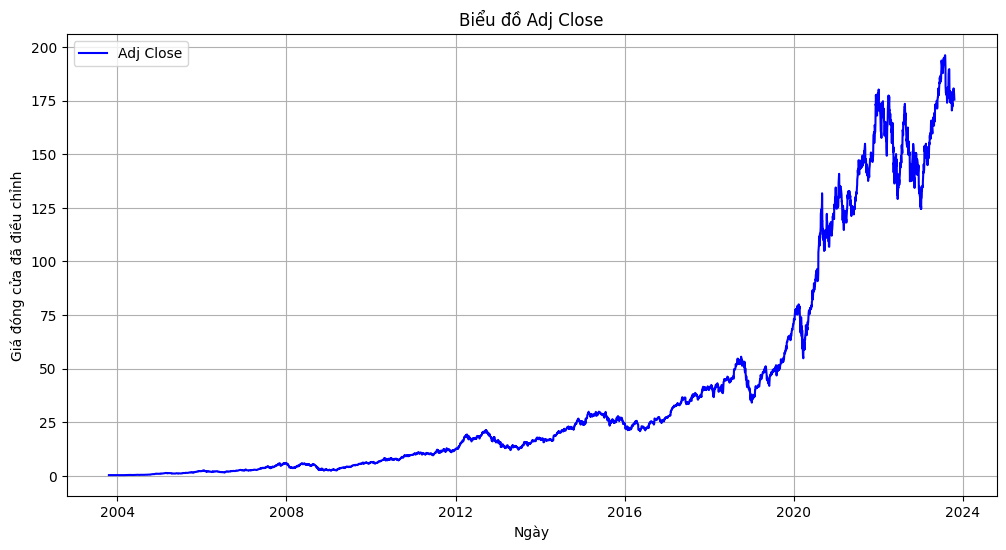

In [11]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Chọn các cột trừ cột 'Adj Close' làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close'])
X

,Open,High,Low,Close,Volume
Date,,,,,
2003-10-20,0.403571,0.416786,0.399643,0.414643,279132000
2003-10-21,0.416250,0.417857,0.406250,0.413929,176461600
2003-10-22,0.409643,0.414286,0.405000,0.406429,161599200
2003-10-23,0.405893,0.413393,0.403393,0.410536,165211200
2003-10-24,0.402857,0.408036,0.396964,0.403571,219856000
...,...,...,...,...,...
2023-10-13,181.419998,181.929993,178.139999,178.850006,51427100
2023-10-16,176.750000,179.080002,176.509995,178.720001,52517000
2023-10-17,176.649994,178.419998,174.800003,177.149994,57549400


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [13]:
# Chuẩn hóa Min_Max_Scaler cho từng tập dữ liệu X( đầu vào) 
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale.fit(X)
# Lưu mô hình chuẩn hóa vào tệp "minmax_scaler_x.pkl" bằng pickle
import pickle
with open("../Scaler_data/Scaler_Apple.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
df_minmax_x = minmax_scale.transform(X)
X_normalizier = pd.DataFrame(df_minmax_x, columns=X.columns, index= X.index) # Chuyển lại về dạng df cho dễ nhìn
X_normalizier

,Open,High,Low,Close,Volume
Date,,,,,
2003-10-20,0.000269,0.000311,0.000287,0.000321,0.074120
2003-10-21,0.000334,0.000317,0.000321,0.000317,0.043395
2003-10-22,0.000300,0.000299,0.000314,0.000279,0.038947
2003-10-23,0.000281,0.000294,0.000306,0.000300,0.040028
2003-10-24,0.000265,0.000267,0.000273,0.000264,0.056381
...,...,...,...,...,...
2023-10-13,0.924345,0.917625,0.912074,0.910249,0.005976
2023-10-16,0.900505,0.903222,0.903712,0.909586,0.006302
2023-10-17,0.899994,0.899886,0.894940,0.901580,0.007808


In [14]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_normalizier, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(4028, 5)
(1007, 5)
(4028,)
(1007,)


# <font color = 'red'>3:Huấn luyện mô hình<font>

In [16]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [18]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [19]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 0.6877295205846524
R-squared (R2) Score: 0.9997358760857422
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 0.7209357704204999
R-squared (R2) Score: 0.9997386742622046


In [20]:
print(y_test)

Date
2018-04-09     40.417503
2022-06-09    141.602127
2012-12-12     16.484436
2020-08-31    126.748962
2008-11-04      3.364569
                 ...    
2013-10-22     16.204180
2018-03-14     42.411640
2005-08-22      1.390510
2023-05-08    173.026688
2008-10-31      3.261501
Name: Adj Close, Length: 1007, dtype: float64


In [21]:
print(y_pred)

[ 4.07318958e+01  1.41077497e+02  1.77309654e+01 ... -4.74126834e-02
  1.72146666e+02  3.56722632e+00]


In [22]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2018-04-09,40.417503,40.731896
2022-06-09,141.602127,141.077497
2012-12-12,16.484436,17.730965
2020-08-31,126.748962,127.644412
2008-11-04,3.364569,3.394262
2013-04-17,12.390774,13.334537
2004-10-04,0.587943,-0.790520
2020-09-14,113.311829,113.733790
2020-04-17,69.132637,68.996557


<Axes: xlabel='Date'>

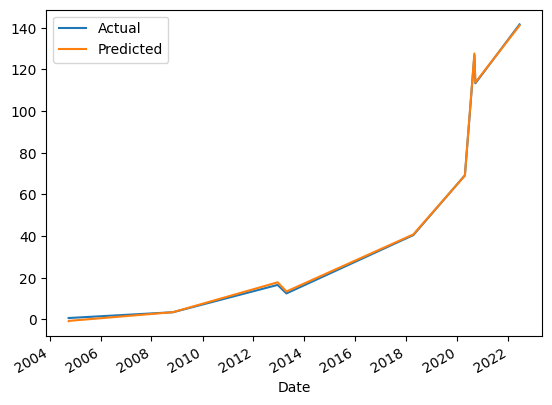

In [23]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [24]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Apple.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)